In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('elprograms.csv', encoding = 'windows-1252')
data = data.rename(columns = {'Business School? (No = 0, Yes = 1)': 'Business', 'Level (Undergrad = 0, Grad = 1)': 'Level'})

In [3]:
cols = list(data.columns)
progs = cols[6:]

In [4]:
#What are popular EL programs among undergraduate business schools as compared to graduate business schools?
business = data[data['Business']==1]
total = business.groupby('Level').sum()

In [5]:
total = total[progs]
total

,Non-profit EL / Service-Learning,Field Work,Industry Labs,Practicum/Apprenticeship,Project-based Courses,Field trips / Industry treks,Student Investment Funds,Global Internship/Project Work,Outdoor Expeditions/Ventures
Level,,,,,,,,,
0,6,4,2,5,11,7,7,8,3
1,9,8,4,2,11,7,11,7,3


In [6]:
table = pd.melt(total.reset_index(), id_vars= 'Level', var_name = 'Programs')

In [7]:
table['Level'] = table['Level'].apply(lambda x: 'Undergraduate' if x==0 else 'MBA')
table

,Level,Programs,value
0,Undergraduate,Non-profit EL / Service-Learning,6
1,MBA,Non-profit EL / Service-Learning,9
2,Undergraduate,Field Work,4
3,MBA,Field Work,8
4,Undergraduate,Industry Labs,2
5,MBA,Industry Labs,4
6,Undergraduate,Practicum/Apprenticeship,5
7,MBA,Practicum/Apprenticeship,2
8,Undergraduate,Project-based Courses,11
9,MBA,Project-based Courses,11


In [12]:
table = table.sort_values(by=['Level','value'], ascending=False)

([<matplotlib.axis.XTick at 0x1c73cd410d0>,
 [Text(0, 0, '0'),
  Text(2, 0, '2'),
  Text(4, 0, '4'),
  Text(6, 0, '6'),
  Text(8, 0, '8'),
  Text(10, 0, '10'),
  Text(12, 0, '12')])

<Figure size 1200x700 with 0 Axes>

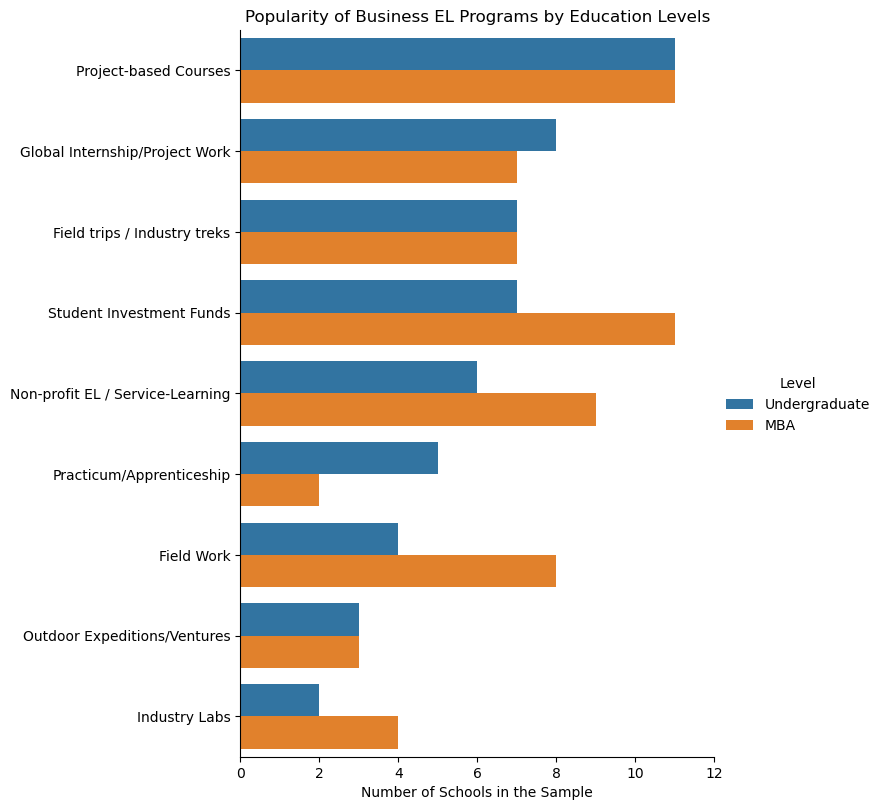

In [13]:
plt.figure(figsize = (12,7))
sns.catplot(
    data = table, kind = 'bar', height = 8,
    x = 'value', y = 'Programs', hue = 'Level').set(xlabel='Number of Schools in the Sample', ylabel=None, title = 'Popularity of Business EL Programs by Education Levels')
plt.xticks([x for x in range(0,14,2)])

In [41]:
#What are popular EL programs among high-ranking business schools?
highrank = data[data['Ranking']<=10]
total = highrank.groupby('Level').sum()
total = total[progs]

In [42]:
table = pd.melt(total.reset_index(), id_vars= 'Level', var_name = 'Programs')

In [43]:
table = table.sort_values(by=['Level','value'], ascending=False)

([<matplotlib.axis.XTick at 0x1c748d17910>,
 [Text(0, 0, '0'), Text(2, 0, '2'), Text(4, 0, '4'), Text(6, 0, '6')])

<Figure size 1200x700 with 0 Axes>

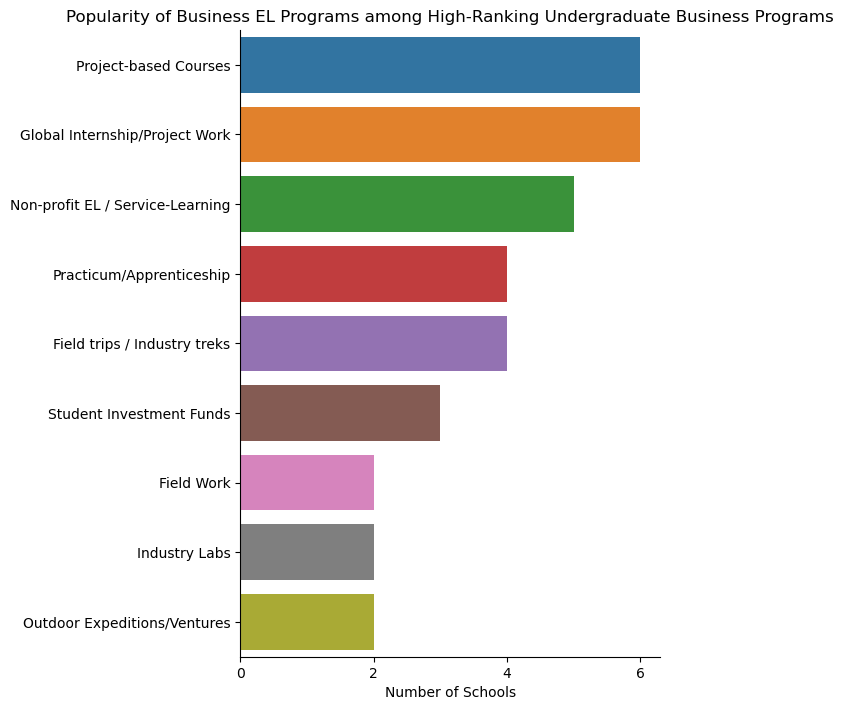

In [57]:
plt.figure(figsize = (12,7))
sns.catplot(
    data = table[table['Level']==0], kind = 'bar', height = 7,
    x = 'value', y = 'Programs').set(xlabel='Number of Schools', ylabel=None, title = 'Popularity of Business EL Programs among High-Ranking Undergraduate Business Programs')
plt.xticks([x for x in range(0,8,2)])

In [80]:
words1 = list(data['EL Program Team'].unique())
words2 = list(data['Center/Office '].unique())

In [82]:
words2.pop(4)

nan

In [84]:
words2[-1] = 'Dyson Office of Student Services and Advising'

In [85]:
words2

['Office of Student Engagement',
 'Wasserman Center for Career Development',
 'Office of Experiential Learning',
 'Center for Leadership and Change Management',
 'Magelli Office of Experiential Learning',
 'Advising, Planning, and Experiential Learning (APEX) Center',
 'Business Career Center',
 'Career Management Center',
 'Undergraduate Programs Office',
 'Consulting and Business Development Center',
 'Tamer Center for Social Enterprise',
 'Center for Career Education',
 'Center for Entrepreneurial Studies',
 'Undergraduate Student Engagement',
 'Graduate Student Engagement',
 'Undegraduate Program',
 'MBA Program Office',
 'BBA Career Management',
 'McCombs+ Global & Experiential Learning',
 'Dyson Office of Student Services and Advising']

In [89]:
words1.pop(2)

nan

In [91]:
words1[-3] = 'Events and Experiential Learning Team'

In [92]:
words1[-7] = 'Director, Entrepreneurial Experiential Programs'

In [93]:
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk import sent_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from nltk.tokenize import TweetTokenizer

In [94]:
word_freq = Counter()
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
for text in words1:
    tokens = word_tokenize(text) 
    words = [word for word in tokens if word.isalpha() == True and word not in stop_words]
    word_freq += Counter(words)
for text in words2:
    tokens = word_tokenize(text) 
    words = [word for word in tokens if word.isalpha() == True and word not in stop_words]
    word_freq += Counter(words)
word_freq

[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Counter({'Career': 9,
         'Experiential': 9,
         'Center': 9,
         'Learning': 8,
         'Student': 7,
         'Office': 6,
         'Program': 5,
         'Engagement': 5,
         'Management': 5,
         'Development': 4,
         'Leadership': 4,
         'Staff': 3,
         'Programs': 3,
         'Undergraduate': 3,
         'Education': 2,
         'Team': 2,
         'Director': 2,
         'Entrepreneurial': 2,
         'Advising': 2,
         'Business': 2,
         'Life': 1,
         'Professional': 1,
         'PDCE': 1,
         'McNulty': 1,
         'Community': 1,
         'RBS': 1,
         'Taskforce': 1,
         'Purdue': 1,
         'University': 1,
         'Events': 1,
         'Wasserman': 1,
         'Change': 1,
         'Magelli': 1,
         'Planning': 1,
         'APEX': 1,
         'Consulting': 1,
         'Tamer': 1,
         'Social': 1,
         'Enterprise': 1,
         'Studies': 1,
         'Graduate': 1,
         'Undegraduate'

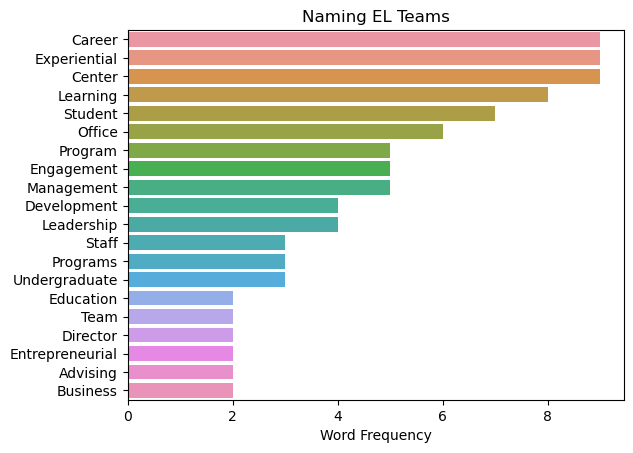

In [97]:
freqList = word_freq.most_common(20)
center = pd.DataFrame(freqList, columns = ['word','count'])
sns.barplot(data = center, x = 'count', y= 'word').set(title = 'Naming EL Teams', ylabel=None, xlabel='Word Frequency')
plt.show()